# Regresion Lineal

**La Regresión es un modelo que nos permite estimar la relacion que existe entre una variable respuesta (y) y un conjunto de variables explicativas (x1, x2, x3, x4, x5 ...)**


## 1.- Importando paquetes y el conjunto de datos

In [ ]:
#Importacion de Librerias
import numpy as np  #Manejo de matrices
import pandas as pd #Manejo de data estructurada (Dataframe)
import matplotlib.pyplot as plt #Graficas
import seaborn as sns #Graficas mas sencillas
%matplotlib inline

In [ ]:
#Importacion de los Datos
df = pd.read_csv("https://raw.githubusercontent.com/aurea-soriano/ML-Datasets/master/USA_Housing.csv")
df.columns = ['PROM_INGRESOS_ZONA', 'PROM_ANT_CASAS_ZONA', 'PROM_HABITACIONES_ZONA',
              'PROM_DORMITORIOS_ZONA', 'POBLACION', 'PRECIO', 'DIRECCION']
df.head()

,PROM_INGRESOS_ZONA,PROM_ANT_CASAS_ZONA,PROM_HABITACIONES_ZONA,PROM_DORMITORIOS_ZONA,POBLACION,PRECIO,DIRECCION
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


## 2.- Exploracion de los Datos

**El método 'info()'los tipos y números de datos**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PROM_INGRESOS_ZONA      5000 non-null   float64
 1   PROM_ANT_CASAS_ZONA     5000 non-null   float64
 2   PROM_HABITACIONES_ZONA  5000 non-null   float64
 3   PROM_DORMITORIOS_ZONA   5000 non-null   float64
 4   POBLACION               5000 non-null   float64
 5   PRECIO                  5000 non-null   float64
 6   DIRECCION               5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


**El método 'describe()' obtiene un resumen de estadísticas de las características del conjunto de datos**

In [ ]:
#df.describe()
df.describe(percentiles=[0.1,0.15,0.25,0.5,0.75,0.9])

,PROM_INGRESOS_ZONA,PROM_ANT_CASAS_ZONA,PROM_HABITACIONES_ZONA,PROM_DORMITORIOS_ZONA,POBLACION,PRECIO
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
10%,55047.633980,4.697755,5.681951,2.310000,23502.845262,7.720318e+05
15%,57653.954310,4.949802,5.922317,2.460000,25753.334669,8.622689e+05
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
90%,82081.188283,7.243978,8.274222,6.100000,48813.618633,1.684621e+06


### 2.1.- Exploracion Grafica

**Diagrama de dispersion por pares usando Pairplots seaborn**

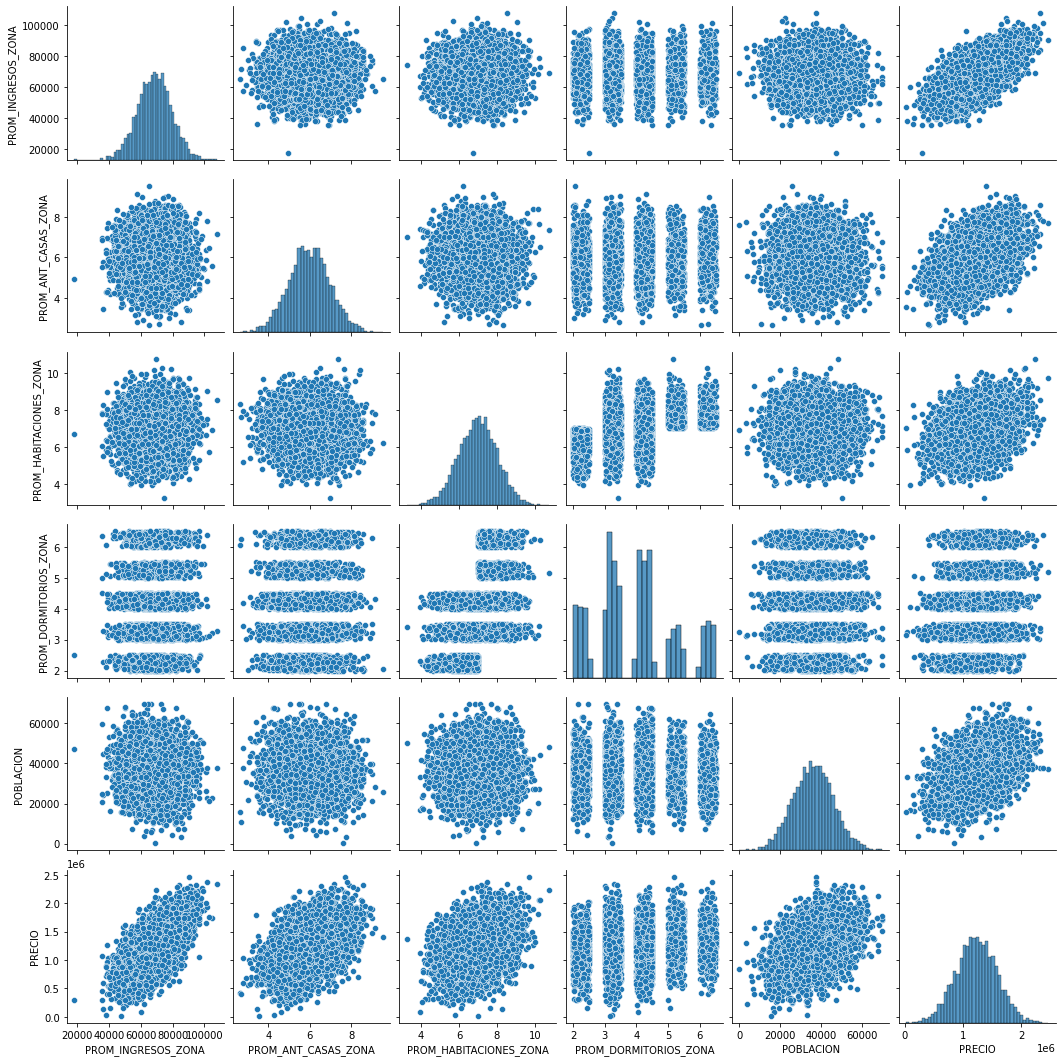

In [ ]:
sns.pairplot(df)

**Distribución del precio (la cantidad prevista)**

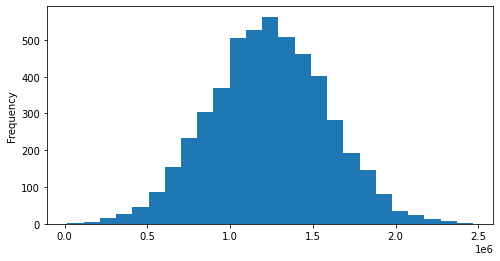

In [ ]:
# Histograma
df['PRECIO'].plot.hist(bins=25,figsize=(8,4))
# Densidad
#df['PRECIO'].plot.density()

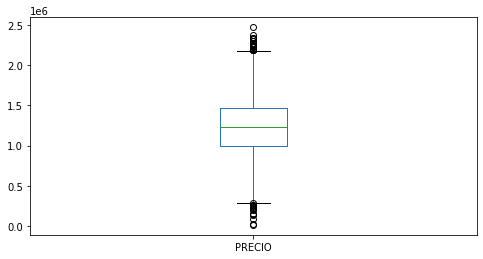

In [ ]:
df['PRECIO'].plot.box(figsize=(8,4))

**Consultar los distintos graficos
https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html**

### 2.2.- Correlaciones

In [ ]:
#Usamos el metodo corr para obtener la matriz de correlaciones
df.corr()

,PROM_INGRESOS_ZONA,PROM_ANT_CASAS_ZONA,PROM_HABITACIONES_ZONA,PROM_DORMITORIOS_ZONA,POBLACION,PRECIO
PROM_INGRESOS_ZONA,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
PROM_ANT_CASAS_ZONA,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
PROM_HABITACIONES_ZONA,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
PROM_DORMITORIOS_ZONA,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
POBLACION,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
PRECIO,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


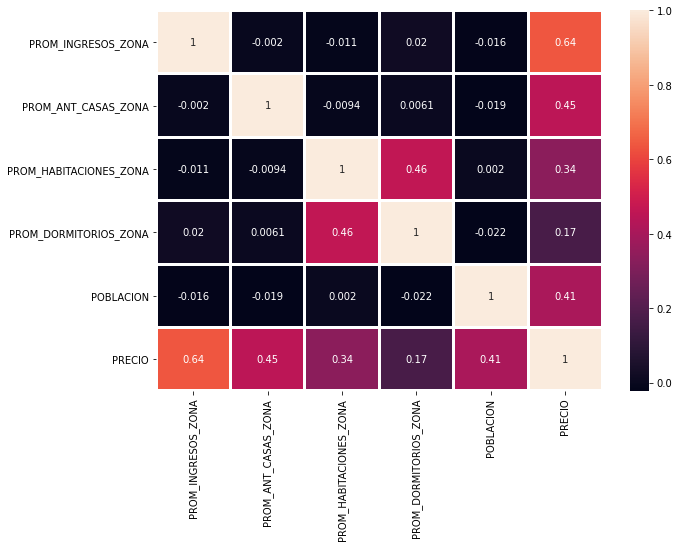

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True, linewidths=2)

## 3.- Modelado

**Empezaremos modelando una regresion lineal simple para después pasar a la regresion lineal multiple**

### 3.1.- Regresion Lineal Simple

In [ ]:
# Definimos la variable respuesta y la variable predictora
target = 'PRECIO'
predictoras = ['PROM_INGRESOS_ZONA']

In [ ]:
# Obtenemos del dataframe el conjunto de datos
X = df[predictoras]
y = df[target]
#Visualizamos las variables predictoras
print('\n\nVisualizamos la variable predictora/independiente (X)')
display(X)
print('\n\nVisualizamos la variable respuesta/dependiente (Y)')
y



Visualizamos la variable predictora/independiente (X)


,PROM_INGRESOS_ZONA
0,79545.458574
1,79248.642455
2,61287.067179
3,63345.240046
4,59982.197226
...,...
4995,60567.944140
4996,78491.275435
4997,63390.686886
4998,68001.331235




Visualizamos la variable respuesta/dependiente (Y)


0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: PRECIO, Length: 5000, dtype: float64

**Muestra de entrenamiento y Validacion**

<img src="https://miro.medium.com/max/1136/1*-8_kogvwmL1H6ooN1A1tsQ.png">

**Separacion en Train y Test**

Nos Ayudamos de la Funcion **train_test_split** de Sklearn

In [ ]:
#Nos quedamos con los 10 primeros registros
prueba = df[:10]
prueba

,PROM_INGRESOS_ZONA,PROM_ANT_CASAS_ZONA,PROM_HABITACIONES_ZONA,PROM_DORMITORIOS_ZONA,POBLACION,PRECIO,DIRECCION
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."
7,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06,"972 Joyce Viaduct\nLake William, TN 17778-6483"
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,USS Gilbert\nFPO AA 20957
9,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06,Unit 9446 Box 0958\nDPO AE 97025


In [ ]:
# Generamos el conjunto de train y test gracias a sklearn
from sklearn.model_selection import train_test_split
pru_train, pru_test = train_test_split(prueba, test_size=0.3, random_state = 123)
#Visualizamos los conjuntos de train y test
print('Train')
display(pru_train)
print('\nTest')
display(pru_test)

Train


,PROM_INGRESOS_ZONA,PROM_ANT_CASAS_ZONA,PROM_HABITACIONES_ZONA,PROM_DORMITORIOS_ZONA,POBLACION,PRECIO,DIRECCION
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
7,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06,"972 Joyce Viaduct\nLake William, TN 17778-6483"
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."



Test


,PROM_INGRESOS_ZONA,PROM_ANT_CASAS_ZONA,PROM_HABITACIONES_ZONA,PROM_DORMITORIOS_ZONA,POBLACION,PRECIO,DIRECCION
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,USS Gilbert\nFPO AA 20957
9,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06,Unit 9446 Box 0958\nDPO AE 97025


In [ ]:
# Generamos el conjunto de train y test gracias a sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
print("Tamaño del conjunto de datos Inicial:", df.shape)
print("Tamaño del conjunto de características del entrenamiento:",X_train.shape)
print("Tamaño del conjunto de características de prueba:",X_test.shape)
print("Tamaño de la variable objetivo del entrenamiento:",y_train.shape)
print("Tamaño de la variable objetivo de prueba:",y_test.shape)

Tamaño del conjunto de datos Inicial: (5000, 7)
Tamaño del conjunto de características del entrenamiento: (3500, 1)
Tamaño del conjunto de características de prueba: (1500, 1)
Tamaño de la variable objetivo del entrenamiento: (3500,)
Tamaño de la variable objetivo de prueba: (1500,)


In [ ]:
# Importamos el Modelo de Regresion Lineal
from sklearn.linear_model import LinearRegression
# Importamos las metricas de la regresion
from sklearn import metrics
# Creamos el modelo de la regresion
lm = LinearRegression() # Creando un objeto de Regresión Lineal 'lm'

In [ ]:
# Entrenamiento del modelo
lm.fit(X_train, y_train) # Ajuste el modelo lineal en el objeto 'lm' en sí, es decir, no es necesario establecer esto en otra variable

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Verificamos la intercepción y los coeficientes y los colocamos en un DataFrame**

In [ ]:
print("El término de intersección del modelo lineal:", lm.intercept_)
print("Los coeficientes del modelo lineal:", lm.coef_)

El término de intersección del modelo lineal: -206897.41836459748
Los coeficientes del modelo lineal: [20.99607335]


**Interpretacion**;

**Coeficientes: Por cada aumento/cambio en una unidad de "variable X", la "Variable Y" aumentara/disminuira (depende del signo) en "valor del coeficiente en unidades de Y"**

Por cada aumento en una unidad del **promedio de los ingresos del area**, el **precio de las viviendas** aumentará en **21 dólares** 

**Intercepto: Cuando la "variable X" sea cero, la "Variable Y" será de "valor de la constante en unidades de Y"**

Cuando el **promedio de los ingresos del area** es cero, el **precio de las viviendas** es de **-206897 dólares** 

**Nota: En diversas bibliografías sugieren no interpretar la constante cuando esta no va de acorde con la variable respuesta (valores negativos del precio)**

In [ ]:
# Predecimos la data de entrenamiento y la data del test
train_pred=lm.predict(X_train)
test_pred=lm.predict(X_test)

In [ ]:
# Visualizamos el entrenamiento y la prediccion
display(pd.concat([X_train, y_train], axis = 1).head())
train_pred[:5]

,PROM_INGRESOS_ZONA,PRECIO
4036,74279.926228,1.422004e+06
2883,56957.835209,7.835651e+05
4162,77453.479788,1.664148e+06
4640,77906.185182,1.639099e+06
2430,62472.158580,1.463443e+06


array([1352689.36142195,  988993.46775003, 1419321.52475711,
       1428826.5604102 , 1104772.60573147])

**R cuadrado del ajuste del modelo (que porcentaje de la variacion de y es explicado por x)**

In [ ]:
print("Valor del R cuadrado del train:", round(metrics.r2_score(y_train,train_pred), 2))
print("Valor del R cuadrado del test:", round(metrics.r2_score(y_test,test_pred), 2))

Valor del R cuadrado del train: 0.41
Valor del R cuadrado del test: 0.42


Interpretacion: El **42%** de la variación del **precio de las casas de USA** es explicado por el **promedio de los ingresos del área**

In [ ]:
# Calculando los errores
print("Calculando el Error Absoluto Medio (MAE)")
print("MAE del Train:", metrics.mean_absolute_error(y_train,train_pred))
print("MAE del Test:", metrics.mean_absolute_error(y_test,test_pred))
print("\nCalculando el Error Cuadratico Medio (MSE)")
print("MAE del Train:", metrics.mean_squared_error(y_train,train_pred))
print("MAE del Test:", metrics.mean_squared_error(y_test,test_pred))
print("\nCalculando la Raiz del Error Cuadratico Medio (RMSE)")
print("MAE del Train:", np.sqrt( metrics.mean_squared_error(y_train,train_pred)))
print("MAE del Test:", np.sqrt(metrics.mean_squared_error(y_test,test_pred)))

Calculando el Error Absoluto Medio (MAE)
MAE del Train: 216757.10858454392
MAE del Test: 218757.30221956078

Calculando el Error Cuadratico Medio (MSE)
MAE del Train: 72709550004.28122
MAE del Test: 75849278757.84393

Calculando la Raiz del Error Cuadratico Medio (RMSE)
MAE del Train: 269647.08417537395
MAE del Test: 275407.4776723463


In [ ]:
# Visualizamos el entrenamiento y la prediccion
prueba = pd.concat([X_train, y_train], axis = 1)
prueba['Precio_Predicho'] = train_pred
prueba.to_csv('Regresion_Lineal_Simple.csv', index=False)

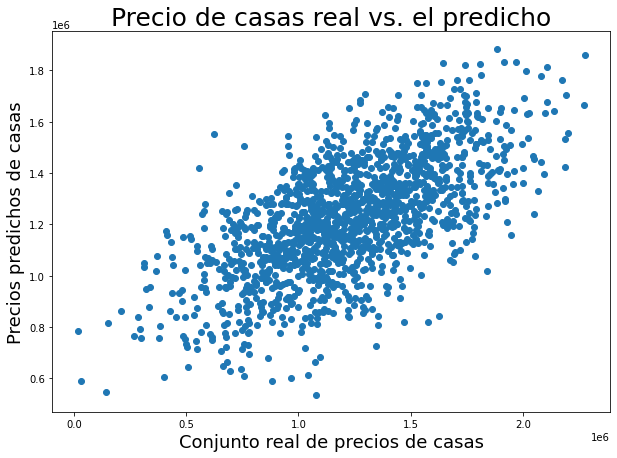

In [ ]:
#Graficamos los valores reales y los predichos
plt.figure(figsize=(10,7))
plt.title("Precio de casas real vs. el predicho",fontsize=25)
plt.xlabel("Conjunto real de precios de casas",fontsize=18)
plt.ylabel("Precios predichos de casas", fontsize=18)
plt.scatter(x=y_test,y=test_pred)

### 3.2.- Regresion Lineal Multiple

#### 3.2.1.- Regresion Lineal Multiple por Gradiente del Descenso (Sklearn)

In [ ]:
# Definimos la variable respuesta y la variable predictora
target = 'PRECIO'
predictoras = ['PROM_INGRESOS_ZONA','PROM_ANT_CASAS_ZONA','PROM_HABITACIONES_ZONA','PROM_DORMITORIOS_ZONA','POBLACION']

In [ ]:
# Obtenemos del dataframe el conjunto de datos
X = df[predictoras]
y = df[target]

In [ ]:
# Generamos el conjunto de train y tes gracias a sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
# Importamos el Modelo de Regresion Lineal
from sklearn.linear_model import LinearRegression
# Importamos las metricas de la regresion
from sklearn import metrics
# Creamos el modelo de la regresion
lm = LinearRegression() # Creando un objeto de Regresión Lineal 'lm'

In [ ]:
# Entrenamiento del modelo
lm.fit(X_train, y_train) # Ajuste el modelo lineal en el objeto 'lm' en sí, es decir, no es necesario establecer esto en otra variable

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Verificamos la intercepción y los coeficientes y los colocamos en un DataFrame**

In [ ]:
print("El término de intersección del modelo lineal:", lm.intercept_)
print("Los coeficientes del modelo lineal:", lm.coef_)

El término de intersección del modelo lineal: -2631028.9017454893
Los coeficientes del modelo lineal: [2.15976020e+01 1.65201105e+05 1.19061464e+05 3.21258561e+03
 1.52281212e+01]


In [ ]:
# Predecimos la data de entrenamiento y la data del test
train_pred=lm.predict(X_train)
test_pred=lm.predict(X_test)

In [ ]:
# Visualizamos el entrenamiento y la prediccion
display(pd.concat([X_train, y_train], axis = 1).head())
train_pred[:5]

,PROM_INGRESOS_ZONA,PROM_ANT_CASAS_ZONA,PROM_HABITACIONES_ZONA,PROM_DORMITORIOS_ZONA,POBLACION,PRECIO
4036,74279.926228,6.929481,7.369607,5.40,26947.152504,1.422004e+06
2883,56957.835209,5.969854,5.935709,2.05,29498.964187,7.835651e+05
4162,77453.479788,5.909818,7.640186,3.02,53100.278674,1.664148e+06
4640,77906.185182,6.537044,9.458466,3.08,31399.756830,1.639099e+06
2430,62472.158580,6.704512,7.665173,6.48,37618.676554,1.463443e+06


array([1423135.94121491,  747864.15237165, 1746060.15637412,
       1745677.61421027, 1332118.74725977])

**R cuadrado del ajuste del modelo (que porcentaje de la variacion de y es explicado por x)**

In [ ]:
print("Valor del R cuadrado del train:", round(metrics.r2_score(y_train,train_pred), 2))
print("Valor del R cuadrado del test:", round(metrics.r2_score(y_test,test_pred), 2))

Valor del R cuadrado del train: 0.92
Valor del R cuadrado del test: 0.92


In [ ]:
# Calculando los errores
print("Calculando el Error Absoluto Medio (MAE)")
print("MAE del Train:", metrics.mean_absolute_error(y_train,train_pred))
print("MAE del Test:", metrics.mean_absolute_error(y_test,test_pred))
print("\nCalculando el Error Cuadratico Medio (MSE)")
print("MAE del Train:", metrics.mean_squared_error(y_train,train_pred))
print("MAE del Test:", metrics.mean_squared_error(y_test,test_pred))
print("\nCalculando la Raiz del Error Absoluto Medio (RMSE)")
print("MAE del Train:", np.sqrt( metrics.mean_squared_error(y_train,train_pred)))
print("MAE del Test:", np.sqrt(metrics.mean_squared_error(y_test,test_pred)))

Calculando el Error Absoluto Medio (MAE)
MAE del Train: 81257.11762033266
MAE del Test: 81739.77482718184

Calculando el Error Cuadratico Medio (MSE)
MAE del Train: 10110916859.639559
MAE del Test: 10489638335.804985

Calculando la Raiz del Error Absoluto Medio (RMSE)
MAE del Train: 100553.054949313
MAE del Test: 102418.9354358118


In [ ]:
# Visualizamos el entrenamiento y la prediccion
prueba = pd.concat([X_train, y_train], axis = 1)
prueba['Precio_Predicho'] = train_pred
prueba.to_csv('Regresion_Lineal_Multiple.csv', index=False)

In [ ]:
prueba

,PROM_INGRESOS_ZONA,PROM_ANT_CASAS_ZONA,PROM_HABITACIONES_ZONA,PROM_DORMITORIOS_ZONA,POBLACION,PRECIO,Precio_Predicho
4036,74279.926228,6.929481,7.369607,5.40,26947.152504,1.422004e+06,1.423136e+06
2883,56957.835209,5.969854,5.935709,2.05,29498.964187,7.835651e+05,7.478642e+05
4162,77453.479788,5.909818,7.640186,3.02,53100.278674,1.664148e+06,1.746060e+06
4640,77906.185182,6.537044,9.458466,3.08,31399.756830,1.639099e+06,1.745678e+06
2430,62472.158580,6.704512,7.665173,6.48,37618.676554,1.463443e+06,1.332119e+06
...,...,...,...,...,...,...,...
1593,71920.678777,6.726673,7.614547,6.17,26341.095572,1.134055e+06,1.361085e+06
4060,69686.320170,5.367355,8.329115,5.41,41007.660003,1.148508e+06,1.394248e+06
1346,48362.981952,6.151660,8.252002,4.19,49354.129732,1.035126e+06,1.177283e+06
3454,72029.312855,7.072146,5.378450,3.41,42143.262812,1.205879e+06,1.386042e+06


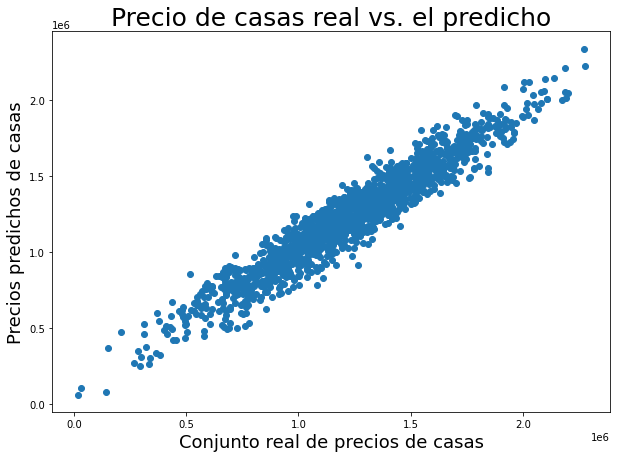

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Precio de casas real vs. el predicho",fontsize=25)
plt.xlabel("Conjunto real de precios de casas",fontsize=18)
plt.ylabel("Precios predichos de casas", fontsize=18)
plt.scatter(x=y_test,y=test_pred)

#### 3.2.2.- Regresion Lineal Multiple por Minimos Cuadrados Ordinarios (Statsmodels)

In [ ]:
# Definimos la variable respuesta y la variable predictora
target = 'PRECIO'
predictoras = ['PROM_INGRESOS_ZONA','PROM_ANT_CASAS_ZONA','PROM_HABITACIONES_ZONA','PROM_DORMITORIOS_ZONA','POBLACION']

In [ ]:
# Obtenemos del dataframe el conjunto de datos
X = df[predictoras]
y = df[target]

In [ ]:
# Generamos el conjunto de train y tes gracias a sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
# importamos la libreria statsmodels
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Agregamos la constante a los datos
X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)

In [ ]:
# Creamos el modelo
model = sm.OLS(y_train, X_train)

In [ ]:
# Entrenamos el modelo
results = model.fit()

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 PRECIO   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     7754.
Date:                Thu, 25 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:25:00   Log-Likelihood:                -45281.
No. Observations:                3500   AIC:                         9.057e+04
Df Residuals:                    3494   BIC:                         9.061e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -2.63

In [ ]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const                    -2.631029e+06
PROM_INGRESOS_ZONA        2.159760e+01
PROM_ANT_CASAS_ZONA       1.652011e+05
PROM_HABITACIONES_ZONA    1.190615e+05
PROM_DORMITORIOS_ZONA     3.212586e+03
POBLACION                 1.522812e+01
dtype: float64
R2:  0.917328958797942


In [ ]:
# Predecimos la data de entrenamiento y la data del test
train_pred=results.predict(X_train)
test_pred=results.predict(X_test)

In [ ]:
# Calculando los errores
print("Calculando el Error Absoluto Medio (MAE)")
print("MAE del Train:", metrics.mean_absolute_error(y_train,train_pred))
print("MAE del Test:", metrics.mean_absolute_error(y_test,test_pred))
print("\nCalculando el Error Cuadratico Medio (MSE)")
print("MAE del Train:", metrics.mean_squared_error(y_train,train_pred))
print("MAE del Test:", metrics.mean_squared_error(y_test,test_pred))
print("\nCalculando la Raiz del Error Absoluto Medio (RMSE)")
print("MAE del Train:", np.sqrt( metrics.mean_squared_error(y_train,train_pred)))
print("MAE del Test:", np.sqrt(metrics.mean_squared_error(y_test,test_pred)))

Calculando el Error Absoluto Medio (MAE)
MAE del Train: 81257.11762033284
MAE del Test: 81739.77482718203

Calculando el Error Cuadratico Medio (MSE)
MAE del Train: 10110916859.639555
MAE del Test: 10489638335.805159

Calculando la Raiz del Error Absoluto Medio (RMSE)
MAE del Train: 100553.05494931298
MAE del Test: 102418.93543581264


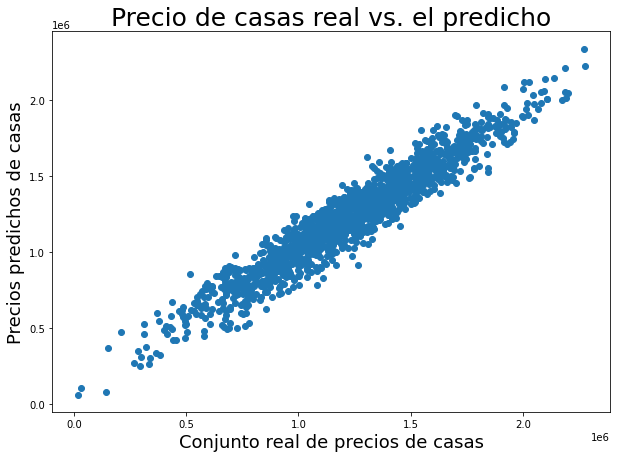

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Precio de casas real vs. el predicho",fontsize=25)
plt.xlabel("Conjunto real de precios de casas",fontsize=18)
plt.ylabel("Precios predichos de casas", fontsize=18)
plt.scatter(x=y_test,y=test_pred)

## 4.- Supuestos del Modelo

**Para garantizar que el modelo de regresión lineal es válido se deben cumplir las siguientes condiciones**

### 4.1.- Independencia de Residuos

**los residuos deben ser independientes entre sí.**
**La independencia podemos comprobarla con el estadístico de Durbin-Watson. Si éste está entre 1.5 e 2.5, entonces podemos asumir que los residuos son independientes.**

In [ ]:
#Importamos los estadisticos de la libreria statsmodels 
import statsmodels.stats.api as sms

In [ ]:
#Calculamos el Valor del Durbin Watson
print("El valor del Durbin Watson es:", round(sms.durbin_watson(results.resid), 3))
#¿Los Residuos son independientes?

El valor del Durbin Watson es: 2.008


### 4.2.- Homocedasticidad (Igualdad de Varianzas)

**para cada valor de la variable X, la varianza de los residuos e = (y estimado - y real) debe ser la misma (es decir, que el ajuste es igual de preciso independientemente de los valores que tome X).**
**Para comprobar la homocedasticidad
Dibujaremos un diagrama de dispersión de las estimaciones (valores predichos por el modelo) tipificadas (ZPRED) frente a los residuos tipificados (ZRESID). de los residuos, haremos un procedimiento gráfico.
Para garantizar que hay homocedasticidad, no se debe mostrar ninguna pauta de asociación (ningún patrón) en la nube de puntos.**

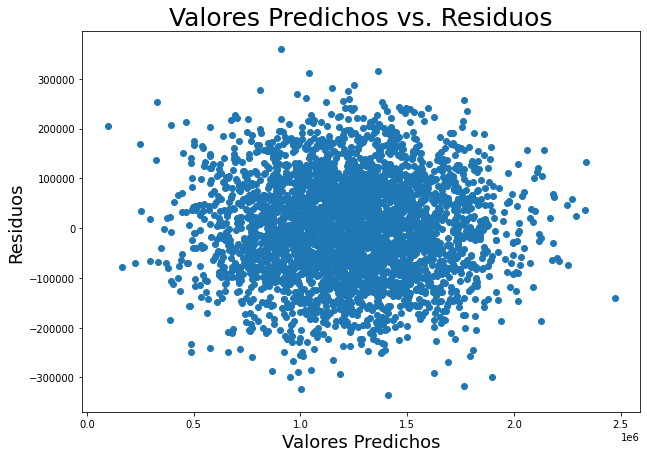

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Valores Predichos vs. Residuos", fontsize=25)
plt.xlabel("Valores Predichos", fontsize=18)
plt.ylabel("Residuos", fontsize=18)
plt.scatter(x=train_pred, y=results.resid)

**Podemos hacer el test de Breuch-Pagan para comprobar la homocedasticidad, La hipótesis nula establece homocedasticidad en los errores.**

In [ ]:
test = sms.het_breuschpagan(results.resid, results.model.exog)
print("El valor de la prueba de Breuch Pagan es:", round(test[1], 3))

El valor de la prueba de Breuch Pagan es: 0.113


### 4.3.- Normalidad 

**Para cada valor de la variable X, los residuos e tienen distribución normal de media cero.**
**Para comprobar la normalidad realizamos el
contraste de normalidad Jarque-Bera, la hipotesis nula establece la normalidad**

In [ ]:
#Calculamos el Valor del Durbin Watson
print("El valor de la prueba Jarque-Bera es:", round(sms.jarque_bera(results.resid)[1], 3))
#¿Hay normalidad de residuos?

El valor de la prueba Jarque-Bera es: 0.081


# 4.4.- Multicolinealidad

**Es la relación de dependencia lineal fuerte entre más de dos variables explicativas.**
**Podemos eliminar las variables con una alta correlacion (Umbral de correlacion)**


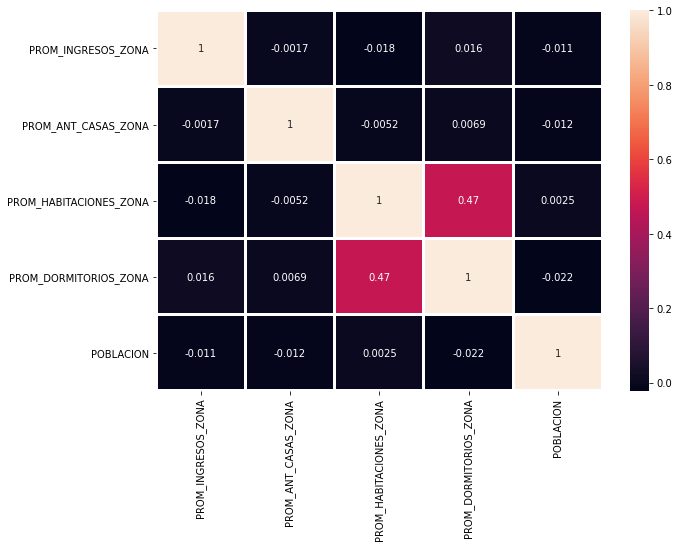

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df[predictoras].corr(method = 'spearman'), annot=True, linewidths=2)

# Ejercicio

**EL dataset de diabetes consiste en 10 variables fisológicas (edad, sexo, peso, presión arterial, y seis pruebas sanguíneas) de 442 pacientes, y la indicación del progreso de la enfermedad después de un año.**

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets

data = datasets.load_diabetes()
diabetes_cols = ['Age', 'Sex', 'Body mass index', 'Average blood pressure',
                 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']      # S1-S6 are 6 blood-serum measurements on each patient
diabetes_df = pd.DataFrame(data.data, columns=diabetes_cols)
diabetes_df['target'] = data.target
diabetes_df.head()

,Age,Sex,Body mass index,Average blood pressure,S1,S2,S3,S4,S5,S6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
